## Capstone Project - The Battle of the Neighborhoods 
### Week 3

## Table of contents
* [Table 1- Postal codes, Buroughs and Neighborhoods](#table1)
* [Table 2- Table 1 + location data](#table2)
* [Clustering](#Clustering)

In [1]:

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 9.8 MB/s  eta 0:00:01
  Created wheel for folium: file

In [2]:
pip install beautifulsoup4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Importing libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests
import itertools

In [353]:
URL ='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(URL)
soup=BeautifulSoup(page.content, 'html.parser')
Tables= soup.findAll('table')
Neighborhoods_df= pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])

In [354]:
Tablerows=Tables[0].find_all('tr')

In [355]:
for rows in Tablerows:
    rowcolumns=rows.find_all('td')
    for columns in rowcolumns:
        postal= columns.text[1:4]
        rest=columns.text[4:].split('(')
        borough = rest[0]
        if borough !='Not assigned\n\n': 
            neighborhood= rest[1].strip("\n\n)").replace("/",",").replace(")"," ")
            if neighborhood==[]:
                neighborhood=borough
            Neighborhoods_df=Neighborhoods_df.append({'PostalCode':postal, 'Borough':borough, 'Neighborhood':neighborhood}, ignore_index=True)

## Table 1 <a name="table1"></a>

In [356]:
pd.set_option('display.max_rows', Neighborhoods_df.shape[0]+1)
Neighborhoods_df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [183]:
Neighborhoods_df.shape

(103, 3)

In [10]:
#Getting coordinates of the neighborhoods

In [252]:
import requests as res

In [316]:
# The code was removed by Watson Studio for sharing.

In [317]:
Neighborhood_loc_df=pd.DataFrame()
# initialize your variable to None
for postal in Neighborhoods_df["PostalCode"]:
    address=postal+"+Toronto+Canada"
    url='https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}'.format(address, key)
    data = requests.get(url).json()
    lat= data["results"][0]["geometry"]['location']["lat"]
    lng= data["results"][0]["geometry"]['location']["lng"]
    Neighborhood_loc_df=Neighborhood_loc_df.append({'Latitude':lat, 'Longitude':lng},ignore_index=True)
    

## Table 2 <a name="table2"></a>

In [357]:
Neighborhoods_df[["Latitude",'Longitude']]= Neighborhood_loc_df[["Latitude","Longitude"]]
Neighborhoods_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [344]:
#Toronto location
Toronto_center=geolocator.geocode("Toronto Canada")

In [358]:
#Map of Toronto with the location of the center of the neighborhoods
map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)
for lat, lng, label in zip(Neighborhoods_df['Latitude'], Neighborhoods_df['Longitude'], Neighborhoods_df['PostalCode']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [17]:
# Retrieving data from 4square

In [359]:
# The code was removed by Watson Studio for sharing.

In [373]:
#Retrieving neighborhood name, category and geo position of the venues
All_venues=pd.DataFrame(columns=['neighborhood','name','categories','lat','lng']);
filtered_columns=['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
for row in Neighborhoods_df.iterrows():
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    row[1]['Latitude'], 
    row[1]['Longitude'], 
    radius, 
    LIMIT)
    results = requests.get(url).json()
    items=results['response']['groups'][0]['items']
    if items!=[]:
        venues=pd.json_normalize(items)
        venues_filt=venues[filtered_columns]
        for row2 in venues_filt.iterrows():
            venues_filt['venue.categories'][row2[0]]=venues_filt['venue.categories'][row2[0]][0]['name']
        venues_filt.columns = [col.split(".")[-1] for col in venues_filt.columns]
        venues_filt['neighborhood']=row[1]['PostalCode']
        All_venues=pd.concat([All_venues,venues_filt])
All_venues.reset_index(inplace=True) 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [374]:
#Grouping venues by neighborhoods
All_venues.groupby(['neighborhood']).count()

,index,name,categories,lat,lng
neighborhood,,,,,
M1B,11,11,11,11,11
M1C,5,5,5,5,5
M1E,14,14,14,14,14
M1G,6,6,6,6,6
M1H,20,20,20,20,20
M1J,10,10,10,10,10
M1K,19,19,19,19,19
M1L,14,14,14,14,14
M1M,9,9,9,9,9


In [375]:
#Binary category of venues/ Preparation for clustering
category_bin=pd.get_dummies(All_venues['categories'])

In [376]:
category_bin['neighborhood']=All_venues['neighborhood']
category_bin=category_bin[['neighborhood'] + list(category_bin.columns[:-1])]
category_bin

,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M3A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M3A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M3A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M3A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M3A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M8Z
3939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M8Z
3940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M8Z
3941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M8Z


In [378]:
#Frequency of venue types per neighborhood
frequency_neigh=category_bin.groupby('neighborhood').mean()

In [380]:
#top 5 most frequent venue categories per neighborhood
top5=pd.DataFrame(columns=['neighborhood', '1', '2', '3', '4', '5'])
for row in frequency_neigh.iterrows():
    List=row[1].sort_values(ascending=False)
    try:
        top5=top5.append({'neighborhood':row[0], '1':List.index[1], '2':List.index[2],'3':List.index[3],'4':List.index[4],'5':List.index[5]}, ignore_index=True)
    except:
        pass
top5

,neighborhood,1,2,3,4,5
0,M1B,Trail,Chinese Restaurant,Martial Arts School,Paper / Office Supplies Store,Construction & Landscaping
1,M1C,Bar,Italian Restaurant,Burger Joint,Yoga Studio,Dog Run
2,M1E,Fast Food Restaurant,Greek Restaurant,Convenience Store,Restaurant,Bus Line
3,M1G,Park,Business Service,Convenience Store,Electronics Store,Distribution Center
4,M1H,Coffee Shop,Bakery,Caribbean Restaurant,Thai Restaurant,Fried Chicken Joint
5,M1J,Convenience Store,Sandwich Place,Fast Food Restaurant,Intersection,Restaurant
6,M1K,Discount Store,Chinese Restaurant,Rental Car Location,Bank,Sandwich Place
7,M1L,Bakery,Coffee Shop,Ice Cream Shop,Pizza Place,Metro Station
8,M1M,Pizza Place,Pharmacy,Auto Workshop,Park,Restaurant
9,M1N,Convenience Store,Skating Rink,Thai Restaurant,Diner,General Entertainment


In [27]:
# K-means Clustering!

In [381]:
from sklearn.cluster import KMeans
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

In [382]:
#Selecting the number of clusters of the Kmeans by analysing the mean distance between the elements of a cluster and its centroid
temp=[];
temp2=[];
for ncluster in range(2,20):
    try:
        frequency_neigh=frequency_neigh.drop('labels',1)
    except:
        pass
    kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(frequency_neigh)
    frequency_neigh['labels']=kmeans.labels_
    for row in frequency_neigh.iterrows():
        temp.append((sum((kmeans.cluster_centers_[int(row[1]['labels'])]- row[1][:-1])**2)))
    temp2.append(sum(temp)/len(temp))

Text(0, 0.5, 'Mean squared error')

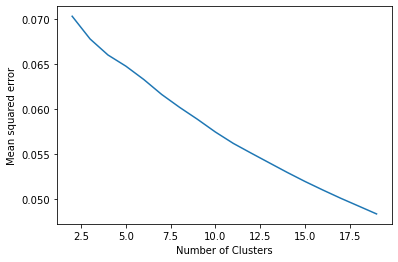

In [383]:
import matplotlib.pyplot as plt
plt.plot(range(2,20),temp2)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean squared error')

### The choice of number of clusters come from the "elbow" method, although sutle we can see a inflection point at 4 clusters

In [390]:
#I guess the knee is around 4 clusters... So thats the number I chose.
ncluster=4
cluster_df=frequency_neigh.drop('labels',1)
kmeans=KMeans(n_clusters=ncluster, init='k-means++',random_state=0).fit(cluster_df)
frequency_neigh['labels']=kmeans.labels_

## Clustering <a name="Clustering"></a>

In [391]:
# set color scheme for the clusters
x = np.arange(ncluster)
ys = [i + x + (i*x)**2 for i in range(ncluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_toronto = folium.Map(location=[Toronto_center.latitude, Toronto_center.longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Neighborhoods_df['Latitude'], Neighborhoods_df['Longitude'], Neighborhoods_df['PostalCode'],frequency_neigh['labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)
       
map_toronto


In [392]:
top5['labels']=kmeans.labels_

In [393]:
#Displaying neighborhoods of cluster 0 and the top 5 categories for each neighborhood
top5[top5['labels']==0]

,neighborhood,1,2,3,4,5,labels
0,M1B,Trail,Chinese Restaurant,Martial Arts School,Paper / Office Supplies Store,Construction & Landscaping,0
1,M1C,Bar,Italian Restaurant,Burger Joint,Yoga Studio,Dog Run,0
4,M1H,Coffee Shop,Bakery,Caribbean Restaurant,Thai Restaurant,Fried Chicken Joint,0
6,M1K,Discount Store,Chinese Restaurant,Rental Car Location,Bank,Sandwich Place,0
10,M1P,Indian Restaurant,Electronics Store,Accessories Store,American Restaurant,Bakery,0
12,M1S,Badminton Court,Clothing Store,Latin American Restaurant,Supermarket,Japanese Restaurant,0
17,M2J,Clothing Store,Fast Food Restaurant,Restaurant,Japanese Restaurant,Bank,0
18,M2K,Bank,Park,Playground,Grocery Store,Intersection,0
20,M2M,Park,Coffee Shop,Pizza Place,Middle Eastern Restaurant,Sushi Restaurant,0
21,M2N,Coffee Shop,Pizza Place,Sushi Restaurant,Ramen Restaurant,Bubble Tea Shop,0


In [394]:
#Displaying neighborhoods of cluster 1 and the top 5 categories for each neighborhood
top5[top5['labels']==1]

,neighborhood,1,2,3,4,5,labels
3,M1G,Park,Business Service,Convenience Store,Electronics Store,Distribution Center,1
9,M1N,Convenience Store,Skating Rink,Thai Restaurant,Diner,General Entertainment,1
19,M2L,Park,Eastern European Restaurant,Discount Store,Distribution Center,Dive Bar,1
22,M2P,Restaurant,Pet Store,Intersection,Golf Course,Convenience Store,1
24,M3A,Food & Drink Shop,Intersection,Park,Yoga Studio,Dumpling Restaurant,1
47,M4T,Grocery Store,Café,Sandwich Place,Candy Store,Japanese Restaurant,1
49,M4W,Trail,Playground,Candy Store,Bank,Grocery Store,1
62,M5N,Playground,Garden,Yoga Studio,Electronics Store,Distribution Center,1
78,M6L,Home Service,Bakery,Park,Yoga Studio,Eastern European Restaurant,1
79,M6M,Discount Store,Auto Garage,Dessert Shop,Sandwich Place,Intersection,1


In [395]:
#Displaying neighborhoods of cluster 2 and the top 5 categories for each neighborhood
top5[top5['labels']==2]

,neighborhood,1,2,3,4,5,labels
101,M9W,Rental Car Location,Escape Room,Distribution Center,Dive Bar,Dog Run,2


In [396]:
#Displaying neighborhoods of cluster 3 and the top 5 categories for each neighborhood
top5[top5['labels']==3]

,neighborhood,1,2,3,4,5,labels
2,M1E,Fast Food Restaurant,Greek Restaurant,Convenience Store,Restaurant,Bus Line,3
5,M1J,Convenience Store,Sandwich Place,Fast Food Restaurant,Intersection,Restaurant,3
7,M1L,Bakery,Coffee Shop,Ice Cream Shop,Pizza Place,Metro Station,3
8,M1M,Pizza Place,Pharmacy,Auto Workshop,Park,Restaurant,3
11,M1R,Rental Car Location,Smoke Shop,Burger Joint,Fish Market,Seafood Restaurant,3
13,M1T,Pharmacy,Shopping Mall,Pizza Place,Intersection,Convenience Store,3
14,M1V,Pizza Place,Fast Food Restaurant,Park,Hobby Shop,Bubble Tea Shop,3
15,M1W,Coffee Shop,Grocery Store,Breakfast Spot,Electronics Store,Bank,3
16,M2H,Park,Ice Cream Shop,Pizza Place,Recreation Center,Chinese Restaurant,3
23,M2R,Pizza Place,Park,Pharmacy,Discount Store,Coffee Shop,3
